# Init

In [1]:
!pip install yellowbrick

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import utils
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
wine = load_wine()
x, y = wine.data, wine.target
labels = wine.target_names

In [4]:
labels

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Clusterização K-Médias

N Clusters: 2 Avg: 0.2616600530532147
N Clusters: 3 Avg: 0.288819165011418
N Clusters: 4 Avg: 0.23832352878271698
N Clusters: 5 Avg: 0.21092682821678096


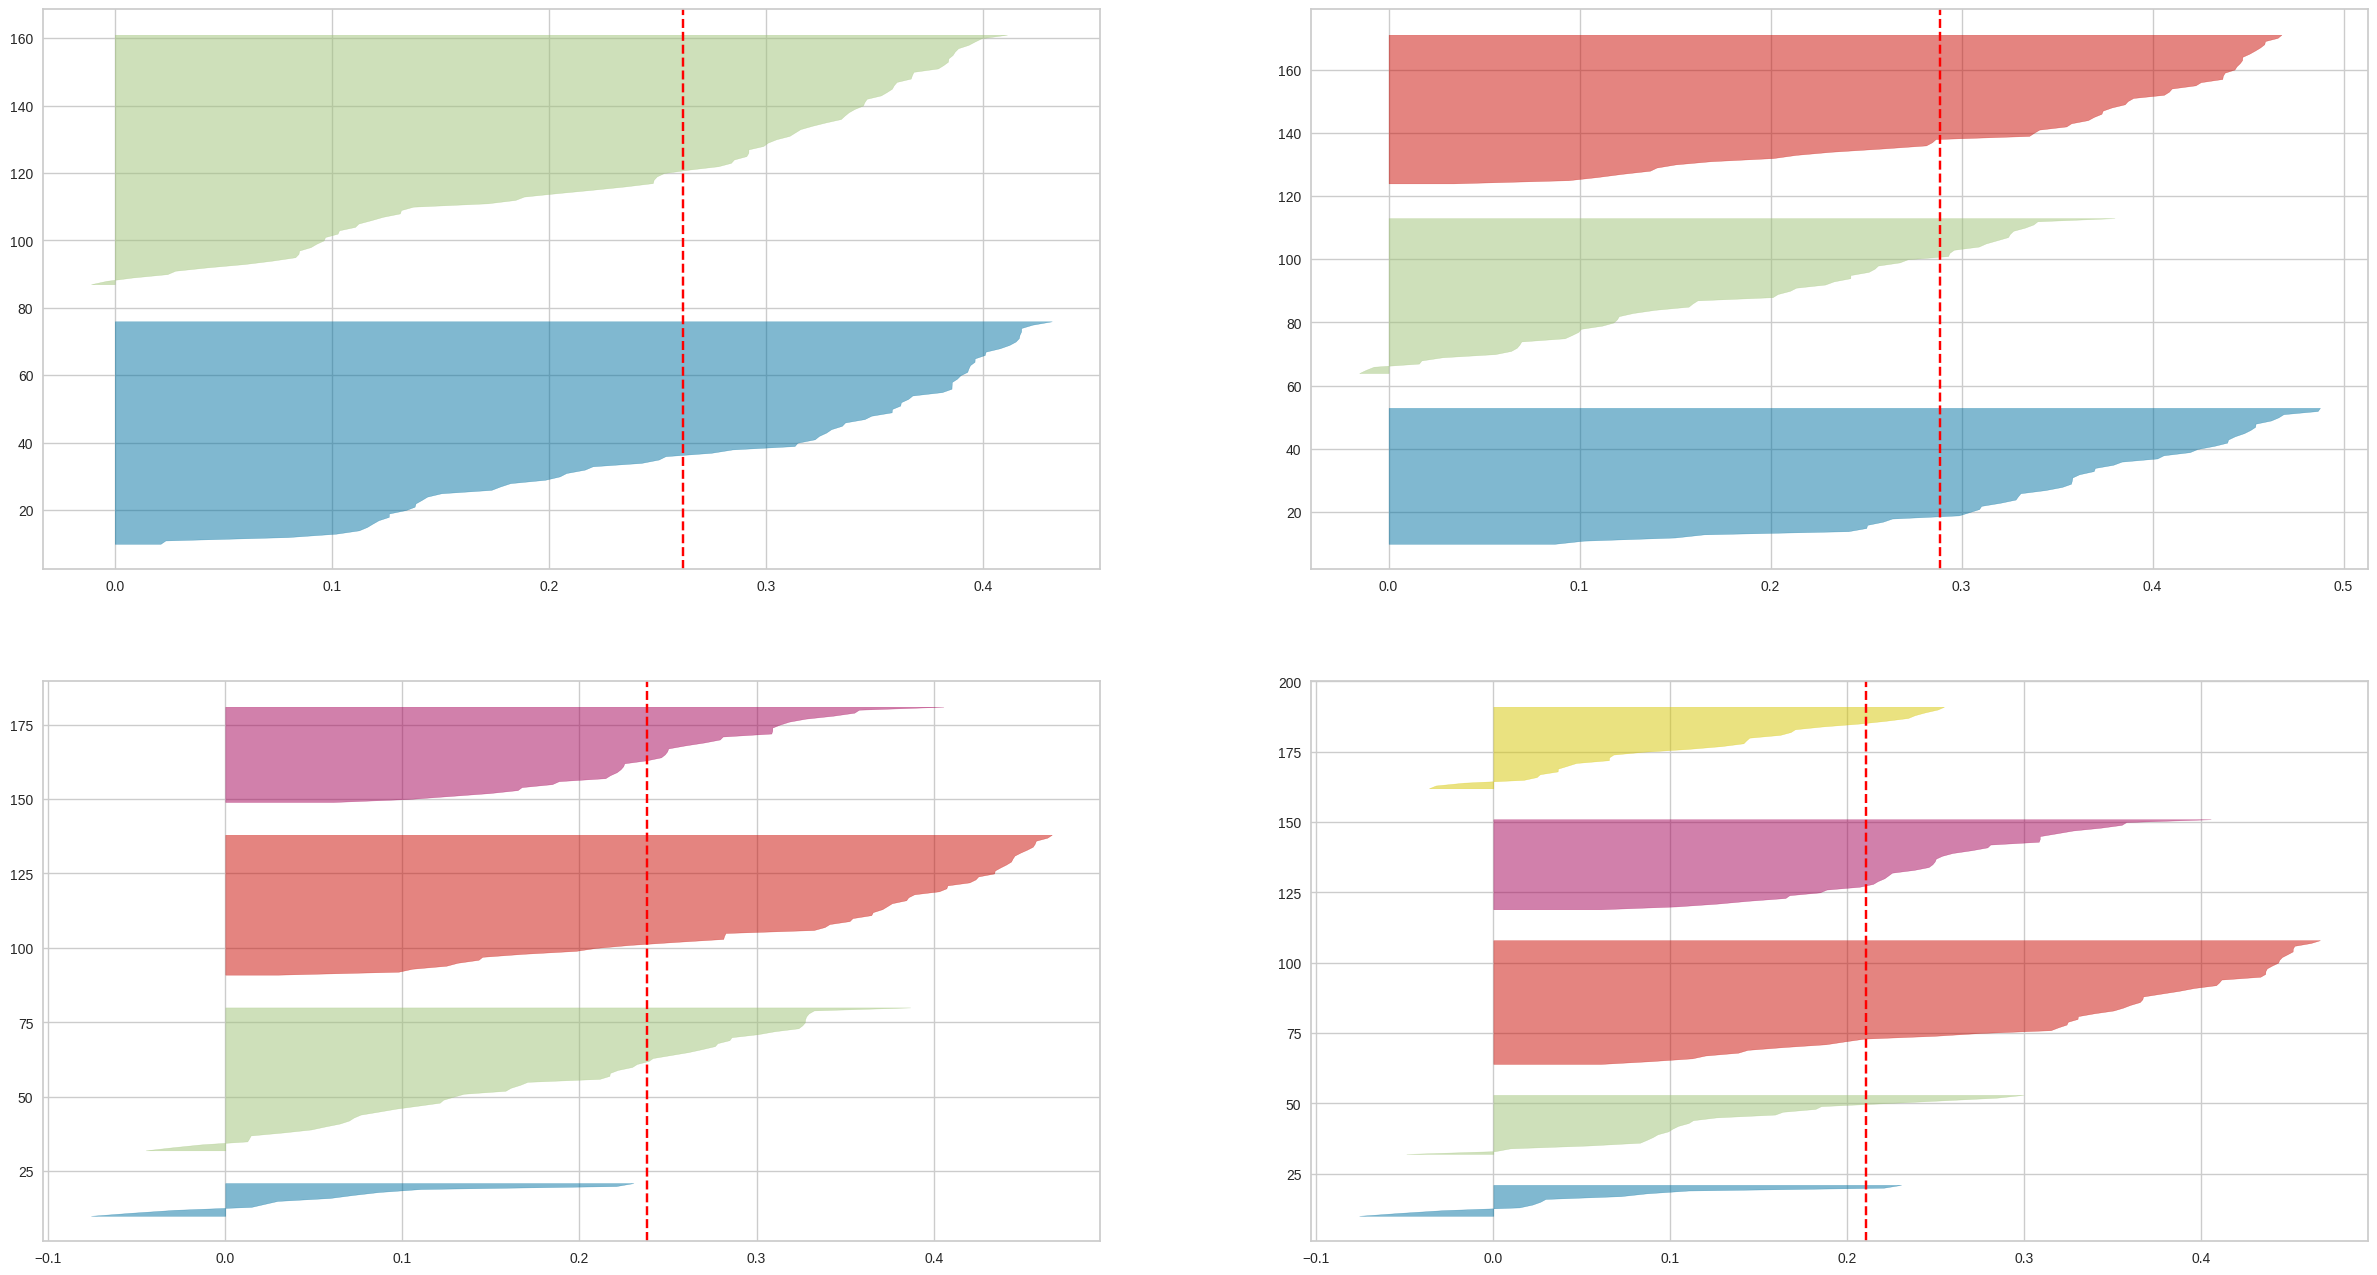

In [7]:
silhouette_scores, range_k = utils.visualize_silhouette(x_train, 5)

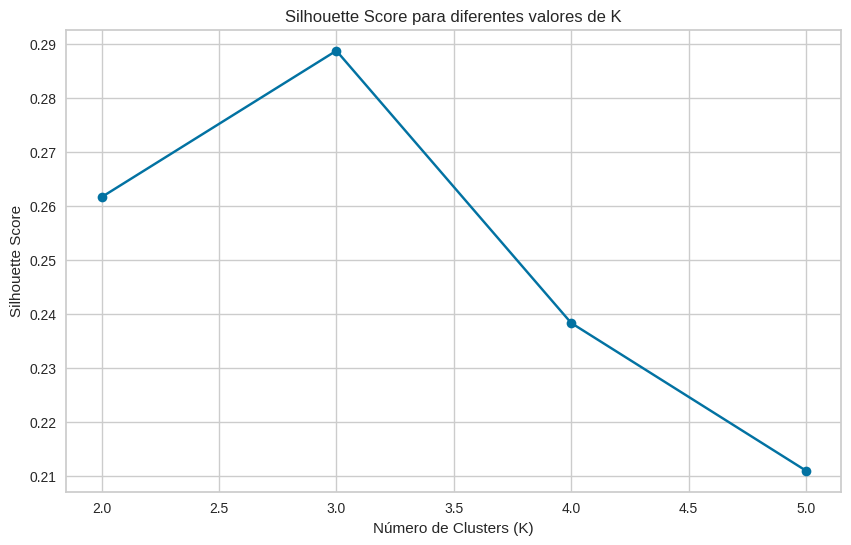

In [8]:
utils.visualize_sil_score_per_cluster(silhouette_scores, range_k)

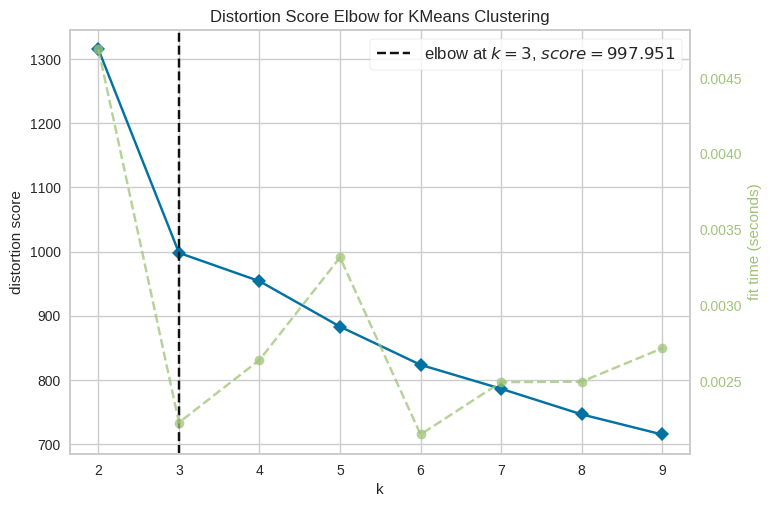

In [9]:
utils.visualize_elbow(x_train, 10)

# Criação de Features

In [10]:
n = 3

In [11]:
km = KMeans(n_clusters=n, random_state=0)
clusters = km.fit_predict(x_train)
centroids = km.cluster_centers_

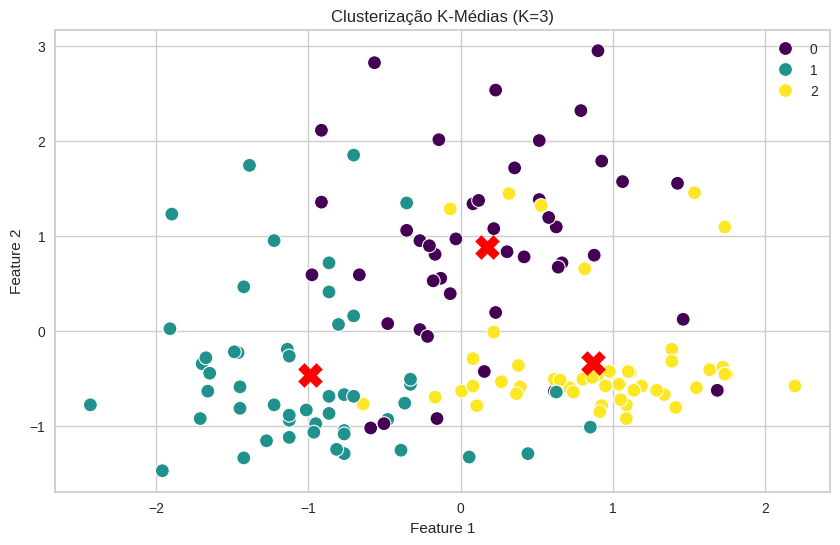

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=clusters, palette='viridis', s=100)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f"Clusterização K-Médias (K={n})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [13]:
x_train_mod, x_test_mod = utils.criar_features_dataset(x_train, x_test, centroids)

In [14]:
x_train_mod

,0,1,2,3,4,5,6,7,8,9,10,11,12,F0,F1,F2
0,0.876683,0.798429,0.644130,0.129743,0.488532,-0.703262,-1.428468,1.072457,-1.368203,0.351932,0.029017,-1.064122,-0.205908,1.854356,4.109742,4.832095
1,-0.366591,-0.758130,-0.397799,0.333800,-1.413024,-1.441531,-0.502998,1.701100,0.023668,-0.841146,0.029017,-0.730832,-0.817047,3.505400,2.823104,5.292735
2,-1.696894,-0.344248,-0.323375,-0.453279,-0.145320,1.249050,0.319642,-1.520697,-0.434631,-0.756829,0.901974,0.519005,-1.312565,5.407977,2.426673,4.109219
3,0.516134,1.383263,0.420859,1.004275,0.136392,-0.752480,-1.233091,0.522394,-0.332787,0.950579,-1.105828,-1.425187,0.025334,1.064582,4.417895,5.091051
4,0.640461,-0.506202,0.904612,0.129743,-0.286176,0.445157,0.679547,-0.656312,0.091564,-0.643002,0.727382,1.713295,0.339162,5.081347,3.013515,2.070749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.448239,-0.587179,-1.811844,-0.016013,-0.990456,0.395939,-0.317904,0.050911,-0.315813,-1.258512,-0.058279,-0.203123,-1.081323,4.539285,1.891732,4.922737
138,-0.764438,-1.082039,-1.662997,0.013139,-1.553880,-0.243895,0.052284,-0.734893,-0.960826,-0.153967,0.727382,1.241134,-0.767495,5.088710,2.484752,4.523784
139,-0.702275,-0.686151,-0.658281,0.858519,0.558960,-0.424360,0.144831,-0.184830,0.006694,-1.258512,0.465495,0.519005,-1.312565,4.369436,1.474882,4.129827
140,1.137771,-0.623169,-0.918763,-1.036300,0.065964,1.380298,1.481621,-1.206375,0.906318,0.444680,-0.189223,1.032828,0.801646,5.780736,4.237402,1.900252


In [15]:
x_test_mod

,0,1,2,3,4,5,6,7,8,9,10,11,12,F0,F1,F2
0,0.938847,-0.632166,-0.435010,-0.919696,1.263240,0.559999,0.977754,-1.206375,0.023668,0.339285,-0.145575,0.852295,1.049405,5.101395,3.977565,1.666640
1,-0.242263,0.267579,0.420859,0.712764,0.840672,-1.277472,-0.605828,-0.970634,-0.587397,2.426117,-2.066080,-1.550170,-0.866599,2.900703,5.272180,5.881925
2,-0.764438,-1.118028,-0.769916,-0.161768,-0.920028,2.036537,1.183414,-1.363536,0.448019,-0.250931,1.163861,0.394022,-1.064806,6.078665,3.129937,3.723910
3,0.715058,-0.578181,0.346436,0.275498,1.122384,1.150614,0.854358,-1.284956,1.432513,0.507918,0.116312,0.616215,1.247613,5.377891,4.226512,1.708478
4,0.080988,3.083782,-0.881551,0.567009,-0.990456,0.592811,0.720679,-0.499152,0.685655,-1.030858,-0.974884,0.713425,-1.196944,4.959221,4.288633,5.164541
5,-1.771491,-0.290263,3.211739,2.607583,1.333668,1.511546,3.219449,0.836715,0.448019,0.402522,-0.101927,1.532763,-0.916150,7.499120,6.396597,6.241157
6,1.336695,-0.200288,0.904612,-0.569883,1.474524,0.559999,0.576717,-0.420571,-0.604371,0.002019,0.465495,1.380005,1.825717,5.310869,4.630979,2.083928
7,-0.776871,1.311284,0.048742,0.421253,-0.849600,0.067819,-1.058280,1.072457,-0.960826,1.098133,-1.716897,-1.397412,-0.734460,1.848564,4.354546,5.783055
8,-0.913631,-0.578181,-0.918763,-0.161768,-1.413024,-0.998570,0.083133,0.050911,0.040642,-0.693592,0.203608,0.810634,-0.767495,4.274665,1.583156,4.296721
9,-1.124988,-0.488207,-0.174528,-0.307523,-1.342596,-1.080600,-0.461866,1.229617,0.057616,-1.115174,0.552791,-0.439204,-0.866599,3.900732,2.167347,4.992199


# SVM

## Modelo de ML

In [16]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

### Dataset Original

In [17]:
svc_ori = SVC(probability=True)

In [18]:
grid_ori = GridSearchCV(estimator=svc_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [19]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

### Dataset Modificado

In [20]:
svc_mod = SVC(probability=True)

In [21]:
grid_mod = GridSearchCV(estimator=svc_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [22]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [23]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Score GridSearch: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



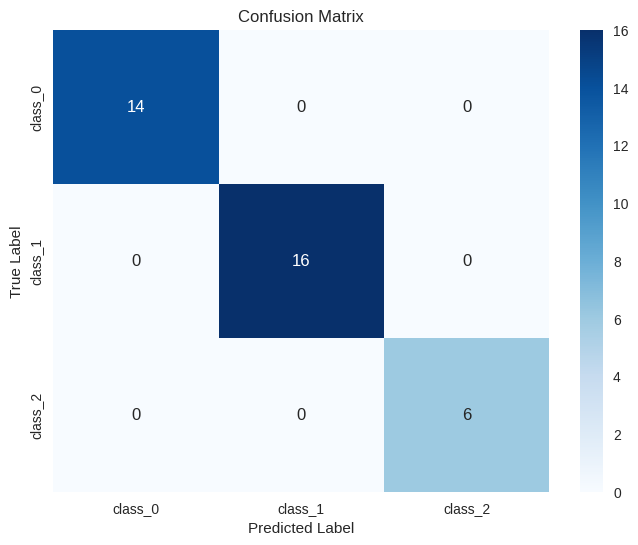

In [24]:
utils.show_cm(y_test, y_pred, labels)

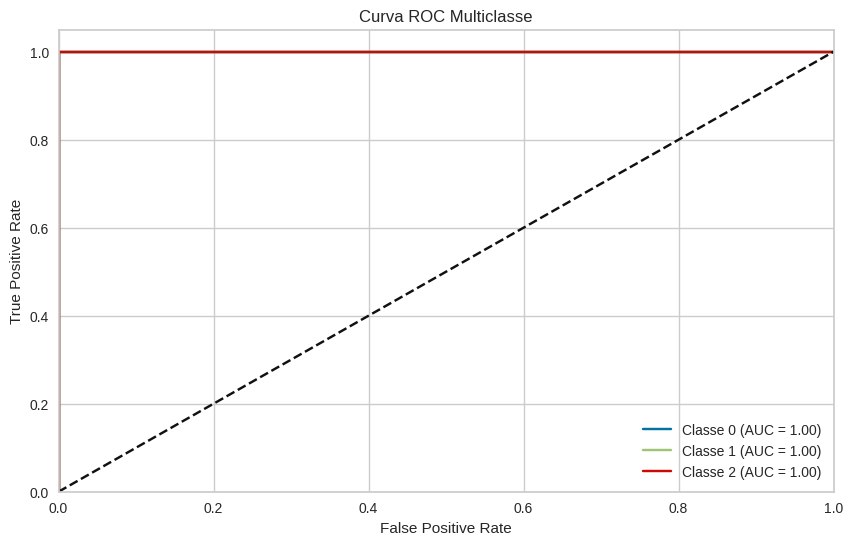

In [25]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [26]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Score GridSearch: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



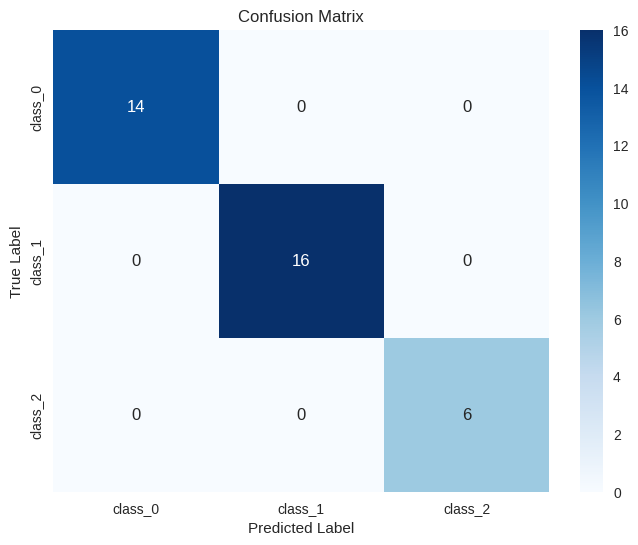

In [27]:
utils.show_cm(y_test, y_pred, labels)

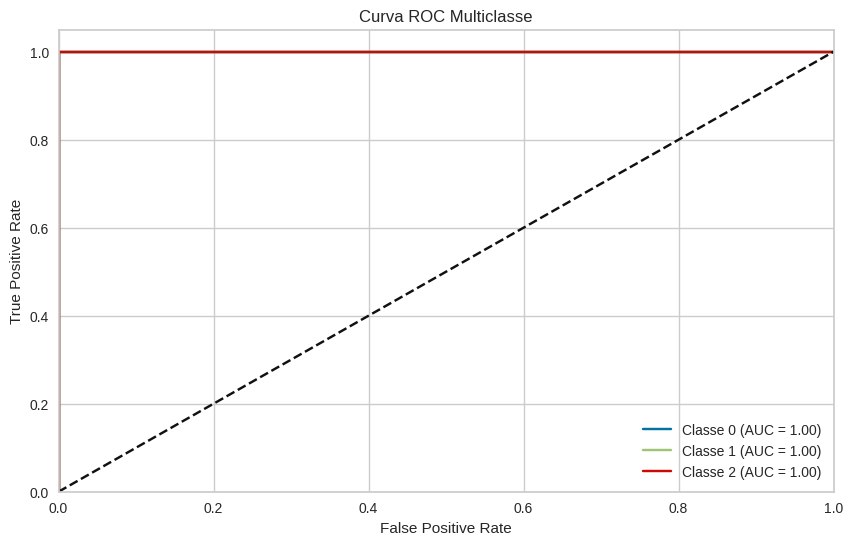

In [28]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

# Random Forest

## Modelo de ML

In [29]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

### Dataset Original

In [30]:
rf_ori = RandomForestClassifier()

In [31]:
grid_ori = GridSearchCV(estimator=rf_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [32]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

### Dataset Modificado

In [33]:
rf_mod = RandomForestClassifier()

In [34]:
grid_mod = GridSearchCV(estimator=rf_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [35]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [36]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Score GridSearch: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



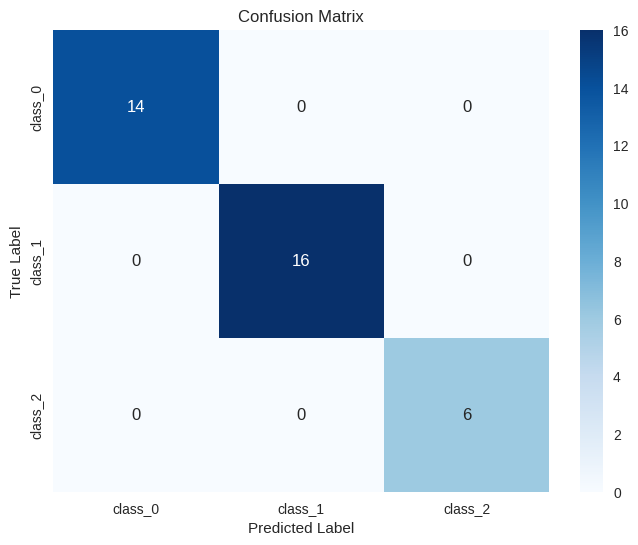

In [37]:
utils.show_cm(y_test, y_pred, labels)

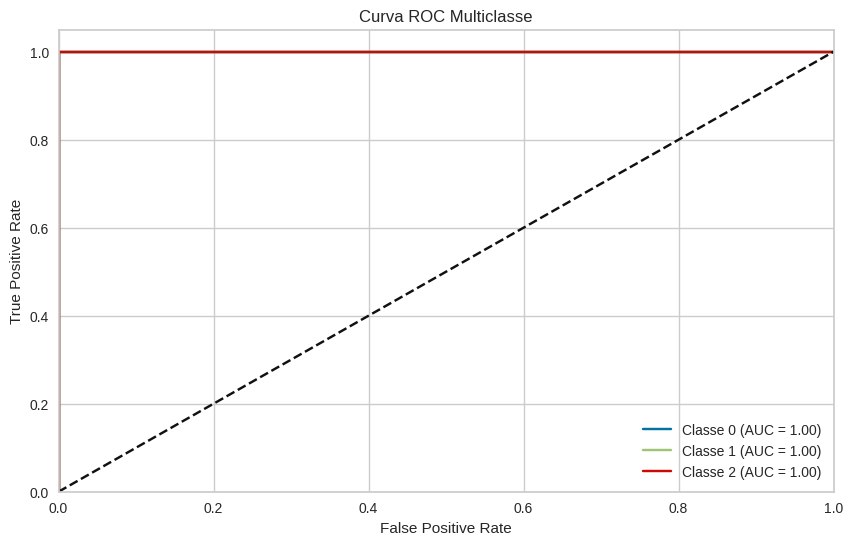

In [38]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_ori.best_estimator_.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [39]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Score GridSearch: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



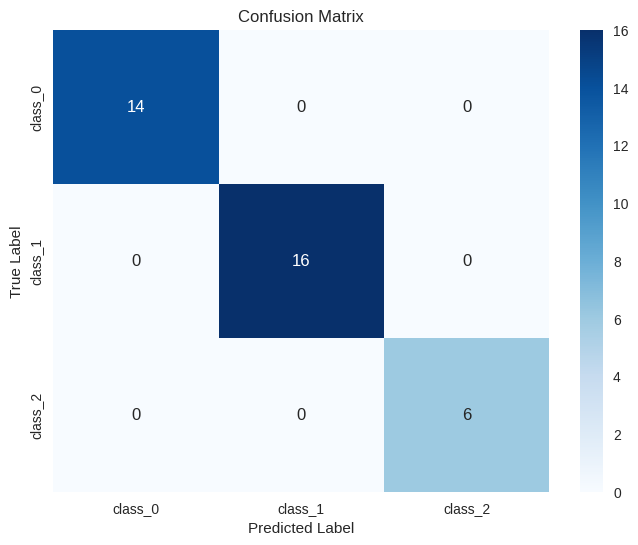

In [40]:
utils.show_cm(y_test, y_pred, labels)

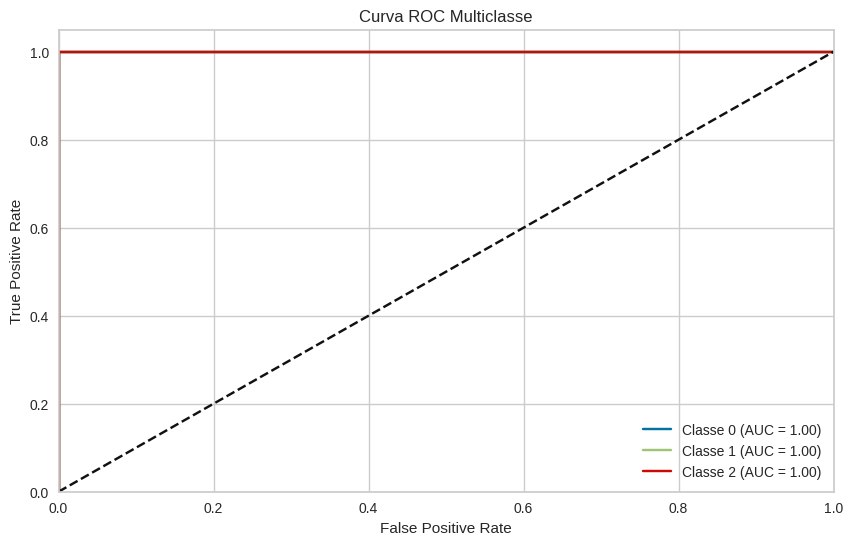

In [41]:
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # número de classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()